In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# https://github.com/oldmonkABA/optimal_histogram_bin_width
def hist_optimize_bins(data):
    data_max = max(data) #lower end of data
    data_min = min(data) #upper end of data
    n_min = 2   #Minimum number of bins Ideal value = 2
    n_max = 200  #Maximum number of bins  Ideal value =200
    n_shift = 30     #number of shifts Ideal value = 30
    N = np.array(range(n_min,n_max))
    D = float(data_max-data_min)/N    #Bin width vector
    Cs = np.zeros((len(D),n_shift)) #Cost function vector
    #Computation of the cost function
    for i in range(np.size(N)):
        shift = np.linspace(0,D[i],n_shift)
        for j in range(n_shift):
            edges = np.linspace(data_min+shift[j]-D[i]/2,data_max+shift[j]-D[i]/2,N[i]+1) # shift the Bin edges
            binindex = np.digitize(data,edges) #Find binindex of each data point
            ki=np.bincount(binindex)[1:N[i]+1] #Find number of points in each bin
            k = np.mean(ki) #Mean of event count
            v = sum((ki-k)**2)/N[i] #Variance of event count
            Cs[i,j]+= (2*k-v)/((D[i])**2) #The cost Function

    C=Cs.mean(1)

    #Optimal Bin Size Selection
    cmin = C.min()
    idx  = np.where(C==cmin)
    idx = idx[0][0]
    Optimal_Bin_Number = N[idx]
    # Optimal_Bin_Width =  D[idx]

    return Optimal_Bin_Number

In [3]:
import socket
def get_Host_name_IP(): 
    try: 
        host_name = socket.gethostname() 
        host_ip = socket.gethostbyname(host_name) 
        print("Hostname :  ",host_name) 
        print("IP : ",host_ip) 
    except: 
        print("Unable to get Hostname and IP")
        
get_Host_name_IP()

Hostname :   DESKTOP-8F261I7
IP :  192.168.1.146


In [4]:
import platform
system_conf = platform.uname()
print("Computer Config")
print(f"System: {system_conf.system}")
print(f"Node Name: {system_conf.node}")
print(f"Release: {system_conf.release}")
print(f"Version: {system_conf.version}")
print(f"Machine: {system_conf.machine}")
print(f"Processor: {system_conf.processor}")

Computer Config
System: Windows
Node Name: DESKTOP-8F261I7
Release: 10
Version: 10.0.22000
Machine: AMD64
Processor: Intel64 Family 6 Model 158 Stepping 10, GenuineIntel


Ratings Dataset Preprocessing

In [5]:
rating_df = pd.read_csv('./data/UserAnimeList_cleaned.csv', usecols=['username','anime_id','my_score'])

In [6]:
rating_df.shape

(31284030, 3)

In [7]:
rating_df.head(10)

,username,anime_id,my_score
0,karthiga,21,9
1,karthiga,59,7
2,karthiga,74,7
3,karthiga,120,7
4,karthiga,178,7
5,karthiga,210,7
6,karthiga,232,6
7,karthiga,233,6
8,karthiga,249,8
9,karthiga,269,10


In [8]:
rating_df = rating_df.dropna()

In [9]:
rating_df.shape

(31283787, 3)

Text(0, 0.5, 'Frequency')

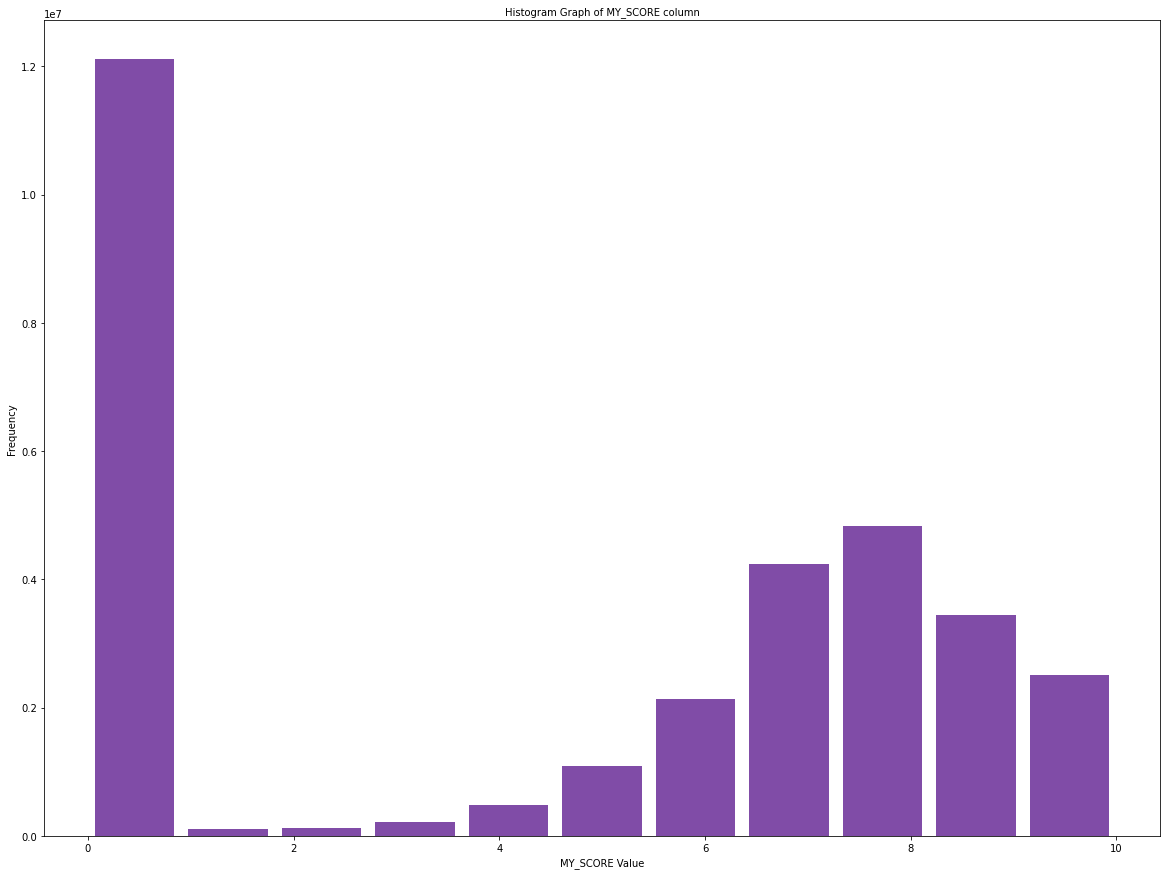

In [10]:
data = rating_df['my_score']
col = 'my_score'
plt.figure(figsize=(20, 15))
plt.hist(data, bins=11, alpha=0.7, rwidth=0.85, color='indigo')
plt.xticks(rotation=0)
plt.title('Histogram Graph of '+col.upper()+' column',fontsize=10)
plt.xlabel(col.upper()+' Value',fontsize=10)
plt.ylabel('Frequency',fontsize=10)

In [11]:
rating_df = rating_df[rating_df.my_score != 0.0]

In [12]:
rating_df.shape

(19171950, 3)

Text(0, 0.5, 'Frequency')

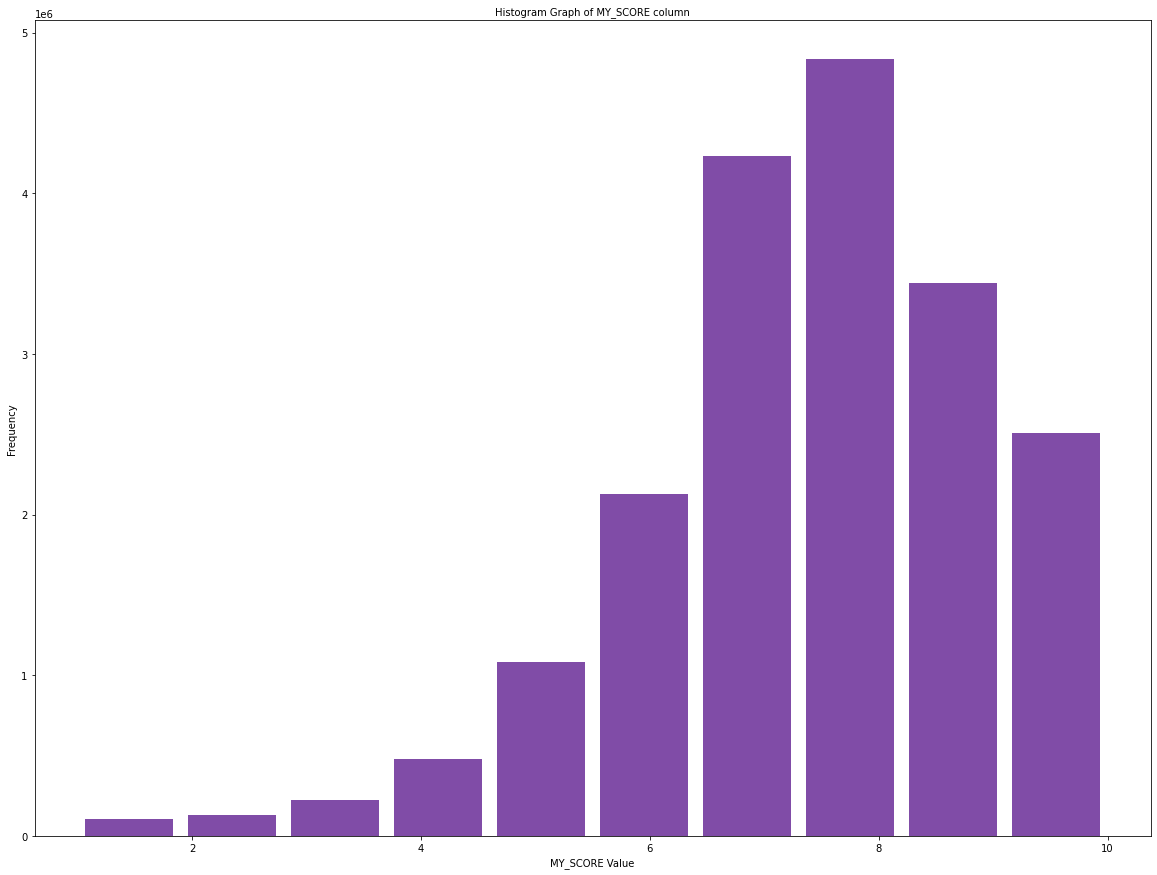

In [13]:
data = rating_df['my_score']
col = 'my_score'
plt.figure(figsize=(20, 15))
plt.hist(data, bins=10, alpha=0.7, rwidth=0.85, color='indigo')
plt.xticks(rotation=0)
plt.title('Histogram Graph of '+col.upper()+' column',fontsize=10)
plt.xlabel(col.upper()+' Value',fontsize=10)
plt.ylabel('Frequency',fontsize=10)

In [14]:
usernames_with_ratingCounts = dict(rating_df['username'].value_counts())

In [15]:
len(usernames_with_ratingCounts)

106401

In [16]:
max_rating_count = max(usernames_with_ratingCounts.values())
max_rating_count

3785

Text(0, 0.5, 'Frequency')

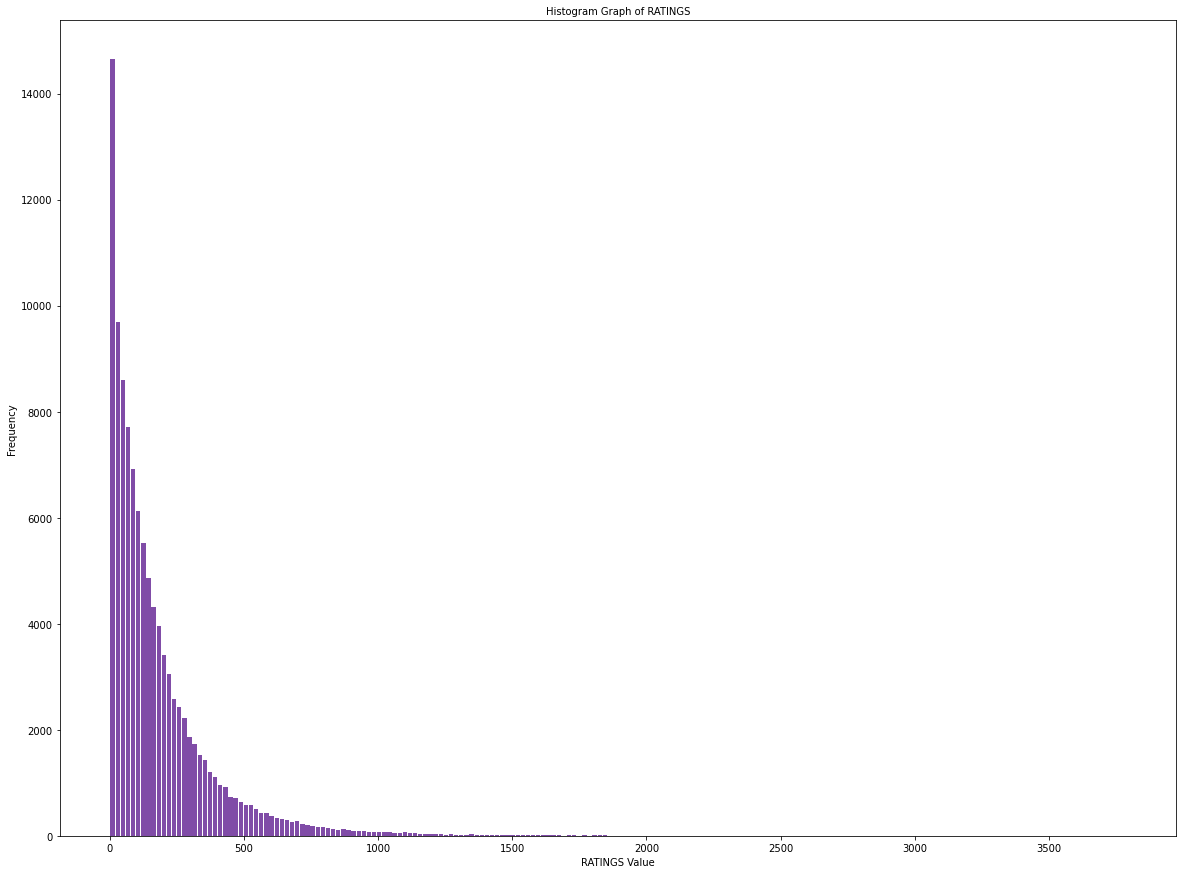

In [17]:
data = list(usernames_with_ratingCounts.values())
col = 'ratings'
plt.figure(figsize=(20, 15))
plt.hist(data, bins=hist_optimize_bins(data), alpha=0.7, rwidth=0.85, color='indigo')
plt.xticks(rotation=0)
plt.title('Histogram Graph of '+col.upper(),fontsize=10)
plt.xlabel(col.upper()+' Value',fontsize=10)
plt.ylabel('Frequency',fontsize=10)

In [18]:
usernames_in_rating_dataset = dict(filter(lambda elem: 1000 < elem[1] <= max_rating_count, usernames_with_ratingCounts.items()))

In [19]:
len(usernames_in_rating_dataset)

1128

In [20]:
rating_df = rating_df[rating_df.username.isin(usernames_in_rating_dataset.keys())]

In [21]:
rating_df.shape

(1518226, 3)

In [22]:
rating_df.head(10)

,username,anime_id,my_score
1201,MistButterfly,59,6
1202,MistButterfly,74,7
1203,MistButterfly,120,8
1204,MistButterfly,178,5
1205,MistButterfly,210,7
1206,MistButterfly,232,9
1207,MistButterfly,249,7
1208,MistButterfly,269,8
1210,MistButterfly,853,9
1211,MistButterfly,857,7


Identifying users in the Rating Dataset

In [23]:
usernames_in_rating = list(usernames_with_ratingCounts.keys())

In [24]:
usernames_in_rating[0:3]

['_thiagobrisolla', 'misterferrari', 'Shouichirou']

Identifying animes in the Rating Dataset

In [25]:
animes_with_ratingCounts = dict(rating_df['anime_id'].value_counts())

In [26]:
animes_in_rating = list(animes_with_ratingCounts.keys())

In [27]:
animes_in_rating[0:3]

[6547, 11757, 4224]

User Dataset Preprocessing

In [28]:
user_df = pd.read_csv('./data/UserList_cleaned.csv', 
                      usecols=['username', 'user_id', 'gender', 'location', 'birth_date'],
                      dtype={"birth_date": "string"})

In [29]:
user_df.shape

(108711, 5)

In [30]:
user_df.head(10)

,username,user_id,gender,location,birth_date
0,karthiga,2255153,Female,"Chennai, India",1990-04-29 00:00:00
1,Damonashu,37326,Male,"Detroit,Michigan",1991-08-01 00:00:00
2,bskai,228342,Male,"Nayarit, Mexico",1990-12-14 00:00:00
3,terune_uzumaki,327311,Female,"Malaysia, Kuantan",1998-08-24 00:00:00
4,Bas_G,5015094,Male,"Nijmegen, Nederland",1999-10-24 00:00:00
5,HimeAria,3129315,Female,Poland,1996-09-26 00:00:00
6,Skallington,326733,Male,Norberg Sweden,1991-03-15 00:00:00
7,Slimak,61677,Male,Poland,1988-02-21 00:00:00
8,Elysiun,5927342,Male,Nebraska,1984-11-16 00:00:00
9,jimothy000,47167,Male,"England,Manchester",1995-04-25 00:00:00


In [31]:
def birth_date_to_age(birth_date):
    return 2022 - int(birth_date.split(' ')[0].split('-')[0])

In [32]:
user_df['birth_date'] = user_df["birth_date"].apply(birth_date_to_age)

In [33]:
user_df = user_df.rename(columns={'birth_date': 'age'})

Dropping users not in the preprocessed rating dataset

In [34]:
user_df = user_df[user_df.username.isin(usernames_in_rating)]

In [35]:
user_df.shape

(106401, 5)

In [36]:
user_df.head(10)

,username,user_id,gender,location,age
0,karthiga,2255153,Female,"Chennai, India",32
1,Damonashu,37326,Male,"Detroit,Michigan",31
2,bskai,228342,Male,"Nayarit, Mexico",32
3,terune_uzumaki,327311,Female,"Malaysia, Kuantan",24
4,Bas_G,5015094,Male,"Nijmegen, Nederland",23
5,HimeAria,3129315,Female,Poland,26
6,Skallington,326733,Male,Norberg Sweden,31
7,Slimak,61677,Male,Poland,34
8,Elysiun,5927342,Male,Nebraska,38
9,jimothy000,47167,Male,"England,Manchester",27


In [38]:
user_df.to_csv('./preprocessed_data/user.csv', encoding='utf-8', index=False)

Converting Usernames to UserIDs in the Ratings Dataset

In [39]:
users_with_IDs = dict(zip(user_df.username, user_df.user_id))

In [40]:
users_with_IDs['Zenit']

28563

In [41]:
def username_to_userid(username):
    return users_with_IDs[username]

In [42]:
rating_df['username'] = rating_df["username"].apply(username_to_userid)

In [43]:
rating_df = rating_df.rename(columns={'username': 'user_id'})

In [44]:
rating_df.head(10)

,user_id,anime_id,my_score
1201,2485327,59,6
1202,2485327,74,7
1203,2485327,120,8
1204,2485327,178,5
1205,2485327,210,7
1206,2485327,232,9
1207,2485327,249,7
1208,2485327,269,8
1210,2485327,853,9
1211,2485327,857,7


In [45]:
rating_df.to_csv('./preprocessed_data/rating.csv', encoding='utf-8', index=False)

Anime List Dataset Preprocessing

In [46]:
anime_df = pd.read_csv('./data/AnimeList_cleaned.csv', usecols=['anime_id','title', 'image_url', 'genre', 'aired_from_year'])

In [47]:
anime_df["genre"] = anime_df["genre"].fillna('NULL')

In [48]:
anime_df.shape

(6668, 5)

In [49]:
anime_df.head(10)

,anime_id,title,image_url,genre,aired_from_year
0,11013,Inu x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Supernatural, Romance, Shounen",2012.0
1,2104,Seto no Hanayome,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Parody, Romance, School, Shounen",2007.0
2,5262,Shugo Chara!! Doki,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Magic, School, Shoujo",2008.0
3,721,Princess Tutu,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Drama, Magic, Romance, Fantasy",2002.0
4,12365,Bakuman. 3rd Season,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Drama, Romance, Shounen",2012.0
5,6586,Yume-iro Pâtissière,https://myanimelist.cdn-dena.com/images/anime/...,"Kids, School, Shoujo",2009.0
6,178,Ultra Maniac,https://myanimelist.cdn-dena.com/images/anime/...,"Magic, Comedy, Romance, School, Shoujo",2003.0
7,2787,Shakugan no Shana II (Second),https://myanimelist.cdn-dena.com/images/anime/...,"Action, Drama, Fantasy, Romance, School, Super...",2007.0
8,4477,Nodame Cantabile: Paris-hen,https://myanimelist.cdn-dena.com/images/anime/...,"Music, Slice of Life, Comedy, Romance, Josei",2008.0
9,853,Ouran Koukou Host Club,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Harem, Romance, School, Shoujo",2006.0


Dropping animes not in the preprocessed rating dataset

In [50]:
anime_df = anime_df[anime_df.anime_id.isin(animes_in_rating)]

In [51]:
anime_df.shape

(6562, 5)

In [52]:
anime_df.head(10)

,anime_id,title,image_url,genre,aired_from_year
0,11013,Inu x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Supernatural, Romance, Shounen",2012.0
1,2104,Seto no Hanayome,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Parody, Romance, School, Shounen",2007.0
2,5262,Shugo Chara!! Doki,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Magic, School, Shoujo",2008.0
3,721,Princess Tutu,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Drama, Magic, Romance, Fantasy",2002.0
4,12365,Bakuman. 3rd Season,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Drama, Romance, Shounen",2012.0
5,6586,Yume-iro Pâtissière,https://myanimelist.cdn-dena.com/images/anime/...,"Kids, School, Shoujo",2009.0
6,178,Ultra Maniac,https://myanimelist.cdn-dena.com/images/anime/...,"Magic, Comedy, Romance, School, Shoujo",2003.0
7,2787,Shakugan no Shana II (Second),https://myanimelist.cdn-dena.com/images/anime/...,"Action, Drama, Fantasy, Romance, School, Super...",2007.0
8,4477,Nodame Cantabile: Paris-hen,https://myanimelist.cdn-dena.com/images/anime/...,"Music, Slice of Life, Comedy, Romance, Josei",2008.0
9,853,Ouran Koukou Host Club,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Harem, Romance, School, Shoujo",2006.0


In [53]:
anime_genre= anime_df["genre"].str.split(', ').tolist()
anime_genre[0:3]

[['Comedy', 'Supernatural', 'Romance', 'Shounen'],
 ['Comedy', 'Parody', 'Romance', 'School', 'Shounen'],
 ['Comedy', 'Magic', 'School', 'Shoujo']]

In [54]:
import itertools
# list, 2D to 1D
genre_all_rows_values = list(itertools.chain.from_iterable(anime_genre))

In [55]:
len(genre_all_rows_values)

23525

In [56]:
genres = list(set(genre_all_rows_values))
len(genres)

44

In [57]:
genres[0:3]

['Vampire', 'Supernatural', 'Parody']

In [58]:
anime_df = anime_df.reindex(anime_df.columns.tolist() + genres, axis=1, fill_value=0)
anime_df.info()
for index, row in anime_df.iterrows():
    for val in row.genre.split(', '):
        if val != 'NA':
            anime_df.loc[index, val] = 1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6562 entries, 0 to 6658
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         6562 non-null   int64  
 1   title            6562 non-null   object 
 2   image_url        6561 non-null   object 
 3   genre            6562 non-null   object 
 4   aired_from_year  6562 non-null   float64
 5   Vampire          6562 non-null   int64  
 6   Supernatural     6562 non-null   int64  
 7   Parody           6562 non-null   int64  
 8   Mystery          6562 non-null   int64  
 9   Game             6562 non-null   int64  
 10  Shounen Ai       6562 non-null   int64  
 11  Action           6562 non-null   int64  
 12  Dementia         6562 non-null   int64  
 13  Shounen          6562 non-null   int64  
 14  Harem            6562 non-null   int64  
 15  Shoujo           6562 non-null   int64  
 16  Seinen           6562 non-null   int64  
 17  Yaoi          

In [59]:
anime_df.head(10)

,anime_id,title,image_url,genre,aired_from_year,Vampire,Supernatural,Parody,Mystery,Game,...,Slice of Life,Police,Mecha,Magic,Super Power,Demons,Josei,Kids,Romance,Psychological
0,11013,Inu x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Supernatural, Romance, Shounen",2012.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2104,Seto no Hanayome,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Parody, Romance, School, Shounen",2007.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,5262,Shugo Chara!! Doki,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Magic, School, Shoujo",2008.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,721,Princess Tutu,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Drama, Magic, Romance, Fantasy",2002.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,12365,Bakuman. 3rd Season,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Drama, Romance, Shounen",2012.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,6586,Yume-iro Pâtissière,https://myanimelist.cdn-dena.com/images/anime/...,"Kids, School, Shoujo",2009.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,178,Ultra Maniac,https://myanimelist.cdn-dena.com/images/anime/...,"Magic, Comedy, Romance, School, Shoujo",2003.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,2787,Shakugan no Shana II (Second),https://myanimelist.cdn-dena.com/images/anime/...,"Action, Drama, Fantasy, Romance, School, Super...",2007.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,4477,Nodame Cantabile: Paris-hen,https://myanimelist.cdn-dena.com/images/anime/...,"Music, Slice of Life, Comedy, Romance, Josei",2008.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
9,853,Ouran Koukou Host Club,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Harem, Romance, School, Shoujo",2006.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
anime_df.shape

(6562, 49)

In [61]:
anime_df.to_csv('./preprocessed_data/anime.csv', encoding='utf-8', index=False)

User Dataset Visualization

Text(0, 0.5, 'Frequency')

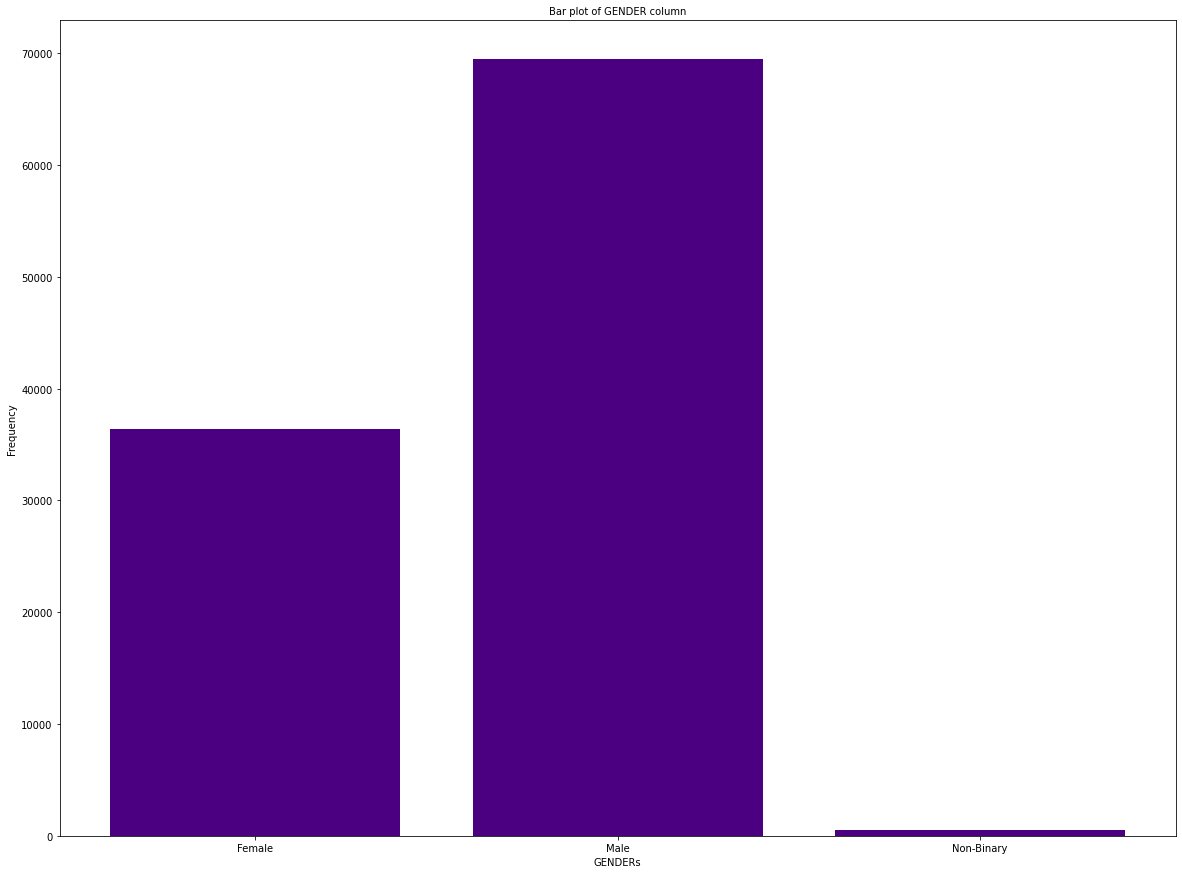

In [62]:
data = user_df["gender"]
gender_names, gender_counts = np.unique(data, return_counts=True)
col = 'gender'
plt.figure(figsize=(20, 15))
plt.bar(gender_names, gender_counts, color='indigo')
plt.xticks(rotation=0)
plt.title(f'Bar plot of {col.upper()} column',fontsize=10)
plt.xlabel(f'{col.upper()}s',fontsize=10)
plt.ylabel('Frequency',fontsize=10)

Text(0, 0.5, 'Frequency')

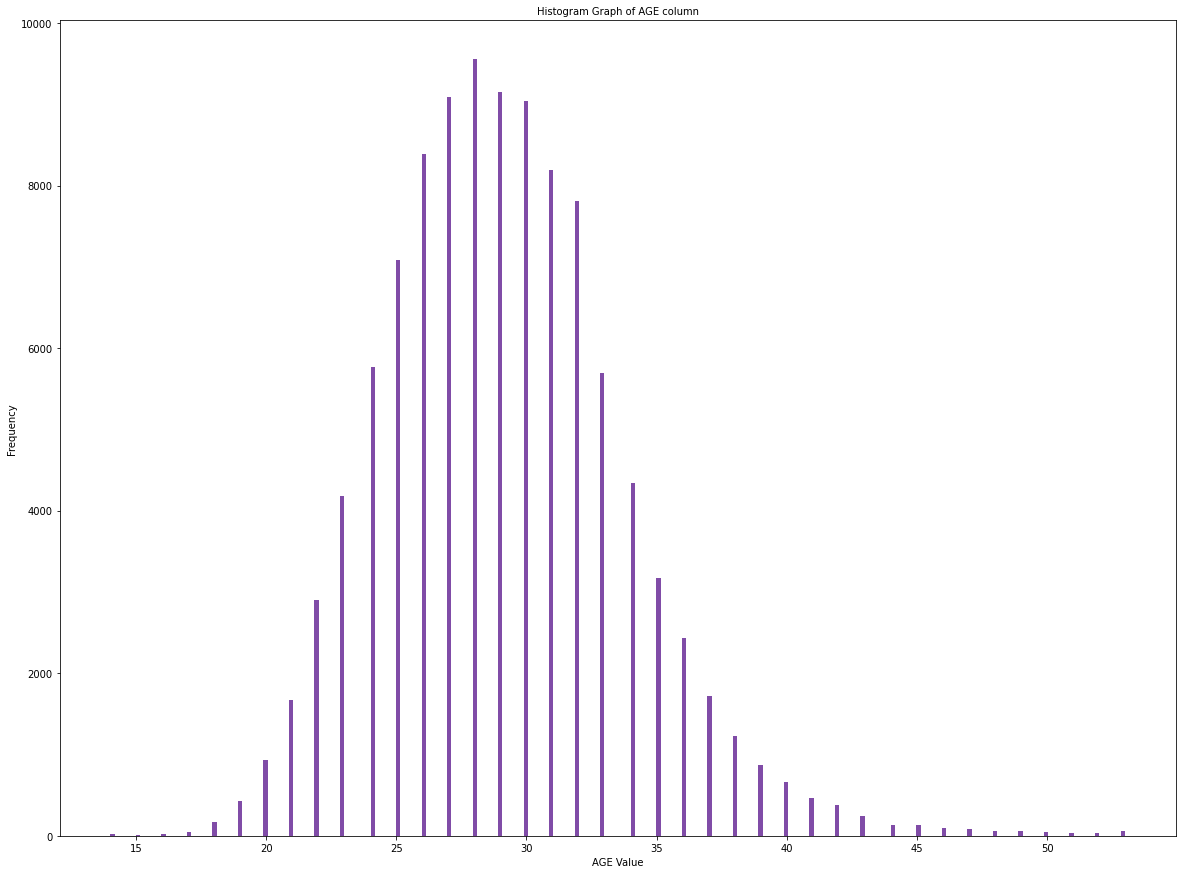

In [63]:
data = user_df['age']
col = 'age'
plt.figure(figsize=(20, 15))
plt.hist(data, bins=hist_optimize_bins(data), alpha=0.7, rwidth=0.85, color='indigo')
plt.xticks(rotation=0)
plt.title('Histogram Graph of '+col.upper()+' column',fontsize=10)
plt.xlabel(col.upper()+' Value',fontsize=10)
plt.ylabel('Frequency',fontsize=10)

Anime Dataset Visualization

Text(0, 0.5, 'Frequency')

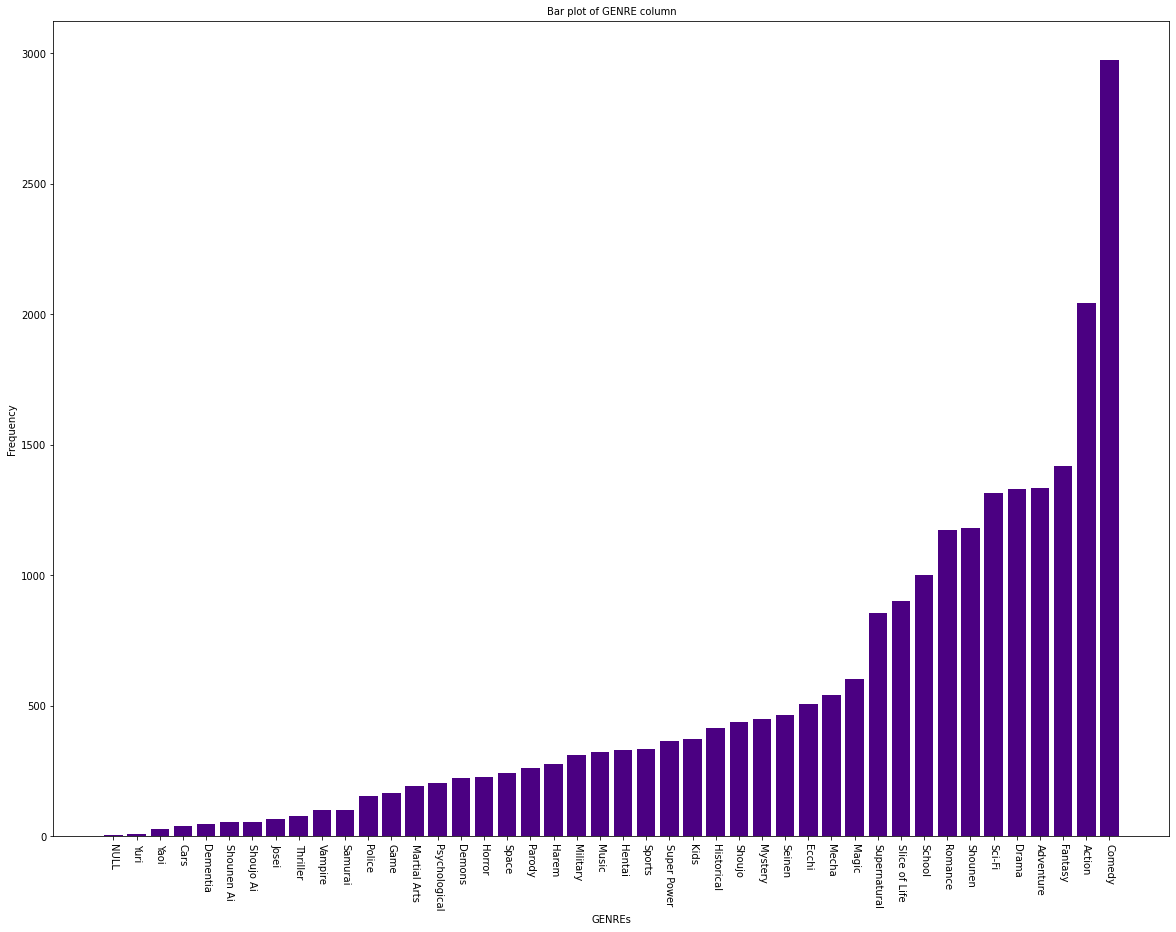

In [64]:
data = []
for genre in genres:
    data.append(anime_df[genre].sum())
data = dict(zip(genres, data))
data = dict(sorted(data.items(), key=lambda item:item[1]))
col = 'genre'
plt.figure(figsize=(20, 15))
plt.bar(data.keys(), data.values(), color='indigo')
plt.xticks(rotation=-90)
plt.title(f'Bar plot of {col.upper()} column',fontsize=10)
plt.xlabel(f'{col.upper()}s',fontsize=10)
plt.ylabel('Frequency',fontsize=10)

Text(0, 0.5, 'Frequency')

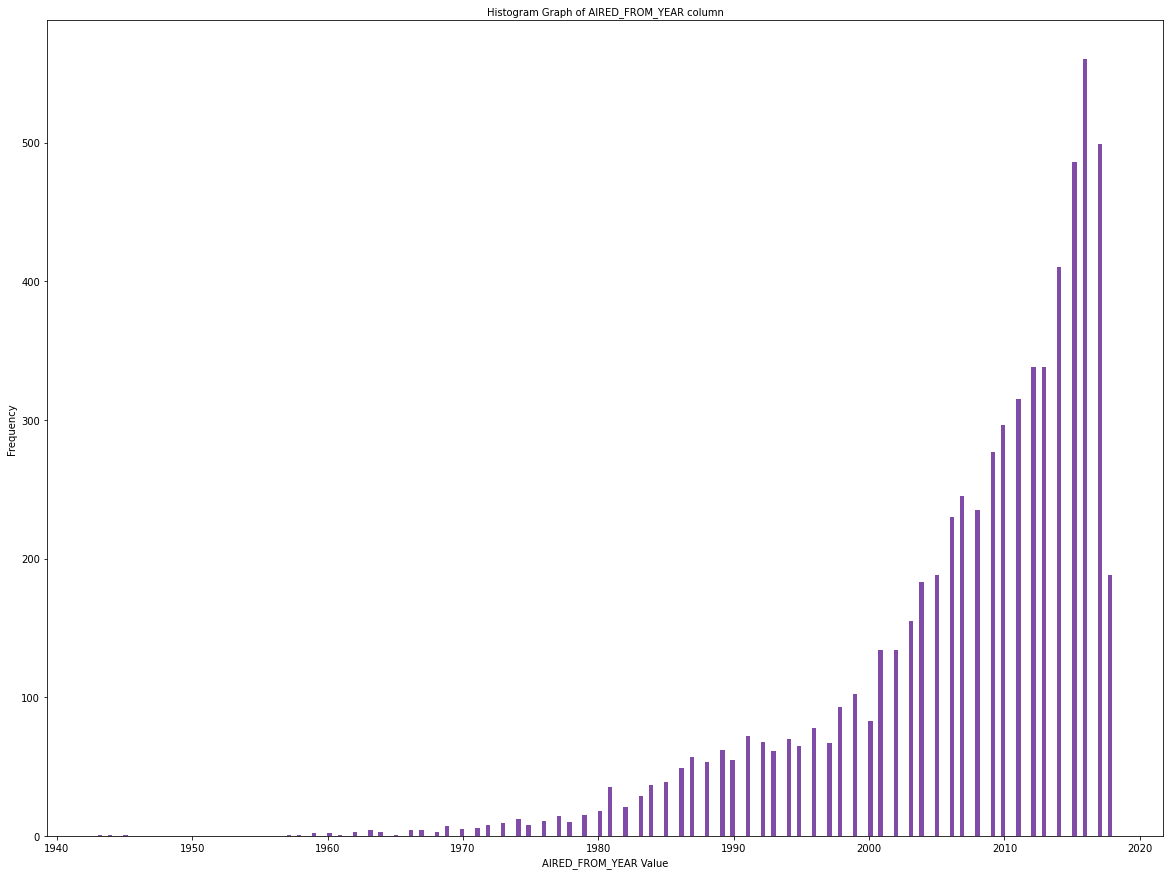

In [65]:
data = anime_df['aired_from_year']
col = 'aired_from_year'
plt.figure(figsize=(20, 15))
plt.hist(data, bins=hist_optimize_bins(data), alpha=0.7, rwidth=0.85, color='indigo')
plt.xticks(rotation=0)
plt.title('Histogram Graph of '+col.upper()+' column',fontsize=10)
plt.xlabel(col.upper()+' Value',fontsize=10)
plt.ylabel('Frequency',fontsize=10)

----------------------------------------- Recommendation Engine -----------------------------------------

In [66]:
%config IPCompleter.greedy=True
import findspark
findspark.init()

from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pyspark.mllib.recommendation import ALS
from pyspark.mllib.recommendation import Rating

In [67]:
conf = SparkConf().set("spark.ui.port", "4050") \
                  .setAppName('Recommendation System with Spark') \
                  .setMaster('local')
sc = SparkContext(conf=conf)
#SparkContext.getOrCreate(conf=conf)
spark = SparkSession.builder \
    .config(conf=conf) \
    .getOrCreate()

In [69]:
rating = sc.textFile("./preprocessed_data/rating.csv")
header = rating.first() #extract header
rating = rating.filter(lambda row: row != header)   #filter out header
rating.take(3)

['2485327,59,6', '2485327,74,7', '2485327,120,8']

In [70]:
trainingRatings, testRatings = rating.randomSplit([0.7, 0.3])

In [71]:
trainingData = trainingRatings.map(lambda l: l.split(',')).map(lambda l: Rating(int(l[0]), int(l[1]), float(l[2]))) 
trainingData.take(3)

[Rating(user=2485327, product=59, rating=6.0),
 Rating(user=2485327, product=74, rating=7.0),
 Rating(user=2485327, product=120, rating=8.0)]

In [72]:
testData = testRatings.map(lambda l: l.split(',')).map(lambda l: (int(l[0]), int(l[1]))) 
testData.take(3)

[(2485327, 210), (2485327, 857), (2485327, 1579)]

In [73]:
def calc_mse(test_rating, predict_rating):
    sum=0
    n=len(predict_rating)
    for i in range(0,n):
        difference = test_rating[i]-predict_rating[i]
        squared_difference = difference**2
        sum = sum +squared_difference
    MSE =sum/n
    print("The Mean Square Error is: ", MSE)

In [74]:
def plot_performance_evaluation_of_model(test_ratings, predict_ratings):
    bars1 = test_ratings[0:5]
    bars2 = predict_ratings[0:5]

    barWidth = 0.3

    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    plt.figure(figsize=(20,15))
    plt.bar(r1, bars1, width = barWidth, color = 'indigo', edgecolor = 'black', capsize=7, label='Rating')
    plt.bar(r2, bars2, width = barWidth, color = 'teal', edgecolor = 'black', capsize=7, label='Prediction')
    
    plt.xticks([r + barWidth for r in range(len(bars1))], ['Prediction_1', 'Prediction_2', 'Prediction_3', 'Prediction_4', 'Prediction_5'])
    plt.ylabel('Rating')
    plt.legend()

    plt.show()

The Mean Square Error is:  4.8693422415962795


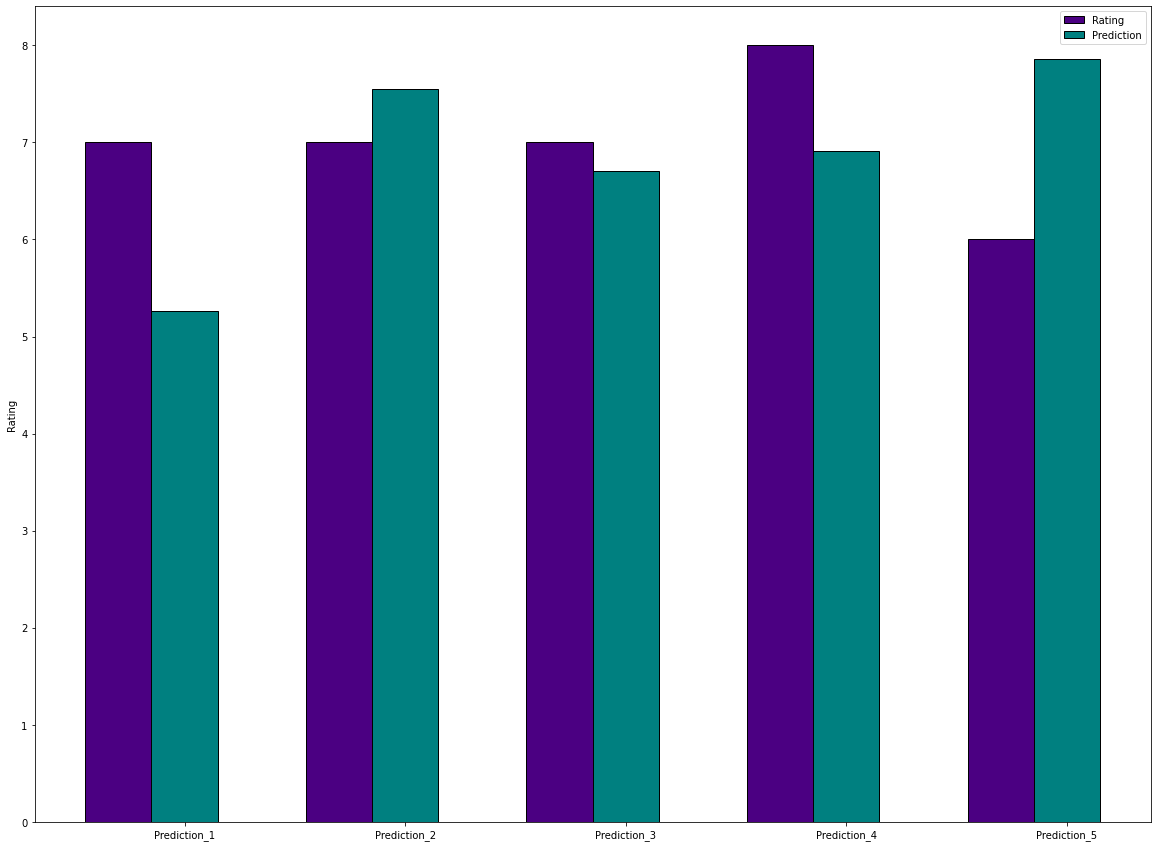

In [75]:
rank, iter, lambda_ = 10, 10, 0.1
model = ALS.train(trainingData, rank=rank, iterations=iter, lambda_=lambda_, seed=5047)
predictions = model.predictAll(testData)
allPredictRatings=predictions.map(lambda l: float(l[2]))
arr_allPredictRatings=allPredictRatings.collect()
allTestRatings = testRatings.map(lambda l: l.split(',')).map(lambda l: (float(l[2]))) 
arr_allTestRatings=allTestRatings.collect()
calc_mse(arr_allTestRatings, arr_allPredictRatings)
plot_performance_evaluation_of_model(arr_allTestRatings, arr_allPredictRatings)

The Mean Square Error is:  5.239742193324081


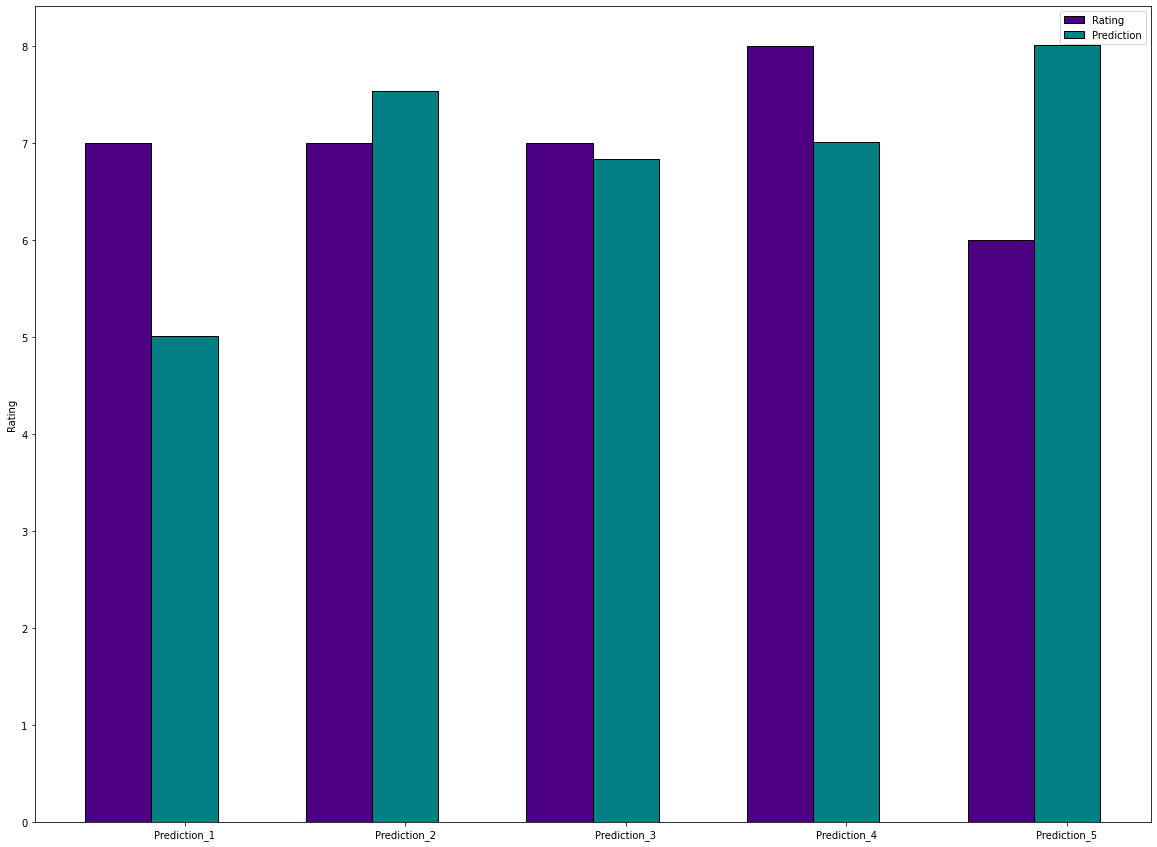

In [76]:
rank, iter, lambda_ = 10, 10, 0.01
model = ALS.train(trainingData, rank=rank, iterations=iter, lambda_=lambda_, seed=5047)
predictions = model.predictAll(testData)
allPredictRatings=predictions.map(lambda l: float(l[2]))
arr_allPredictRatings=allPredictRatings.collect()
allTestRatings = testRatings.map(lambda l: l.split(',')).map(lambda l: (float(l[2]))) 
arr_allTestRatings=allTestRatings.collect()
calc_mse(arr_allTestRatings, arr_allPredictRatings)
plot_performance_evaluation_of_model(arr_allTestRatings, arr_allPredictRatings)

The Mean Square Error is:  4.865241970245112


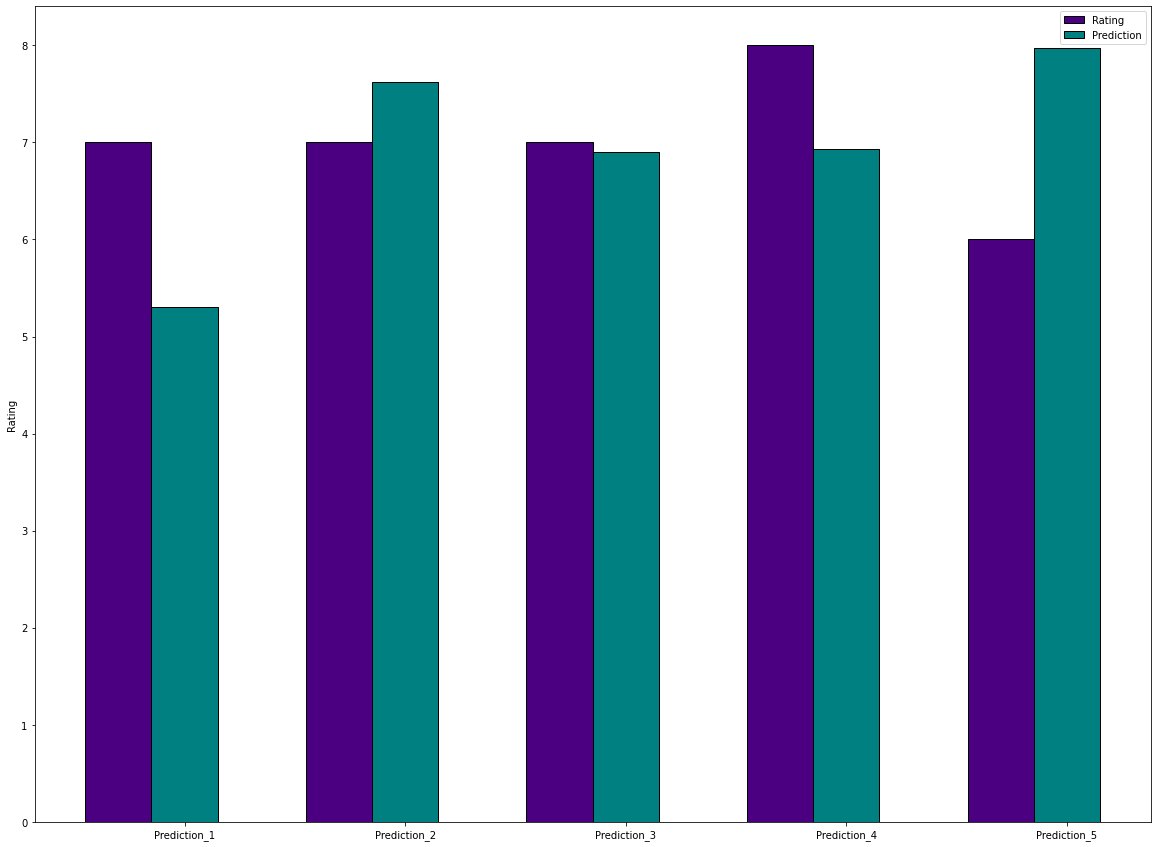

In [77]:
rank, iter, lambda_ = 50, 10, 0.1
model = ALS.train(trainingData, rank=rank, iterations=iter, lambda_=lambda_, seed=5047)
predictions = model.predictAll(testData)
allPredictRatings=predictions.map(lambda l: float(l[2]))
arr_allPredictRatings=allPredictRatings.collect()
allTestRatings = testRatings.map(lambda l: l.split(',')).map(lambda l: (float(l[2]))) 
arr_allTestRatings=allTestRatings.collect()
calc_mse(arr_allTestRatings, arr_allPredictRatings)
plot_performance_evaluation_of_model(arr_allTestRatings, arr_allPredictRatings)

The Mean Square Error is:  5.832229445755664


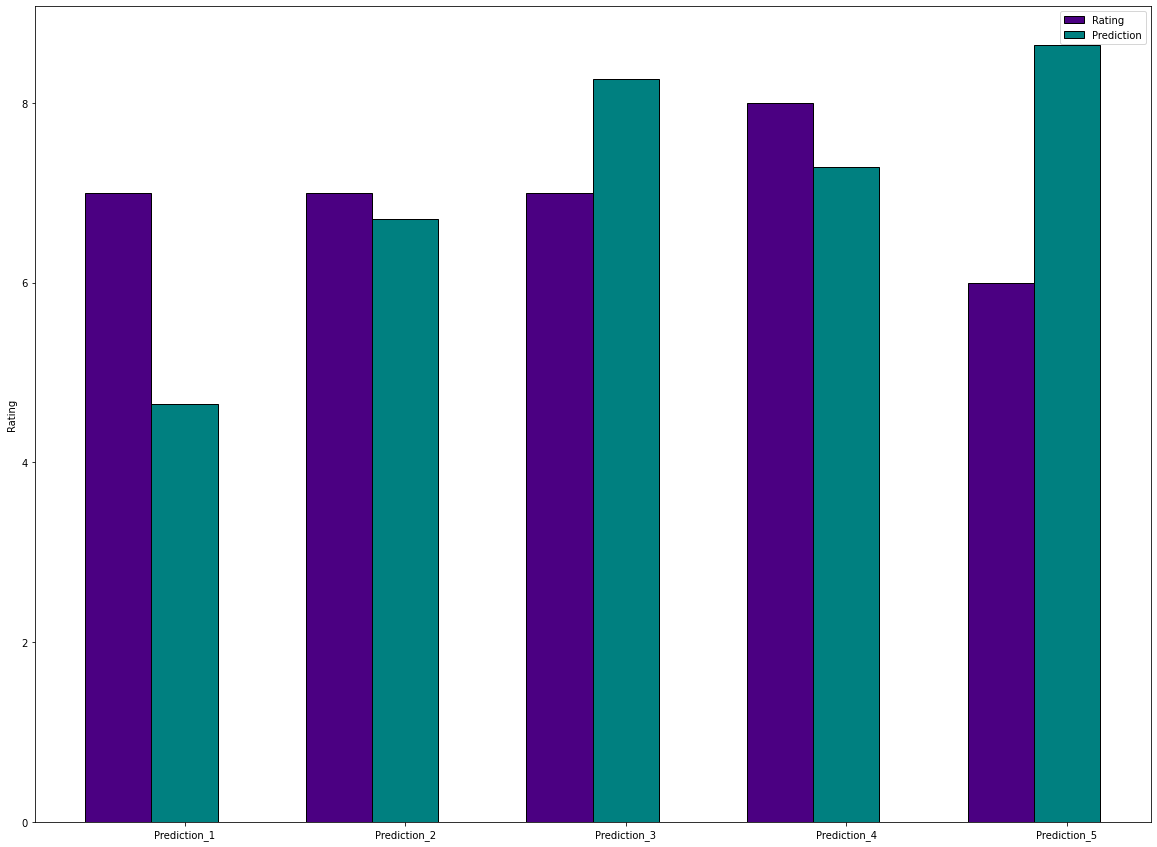

In [78]:
rank, iter, lambda_ = 50, 10, 0.01
model = ALS.train(trainingData, rank=rank, iterations=iter, lambda_=lambda_, seed=5047)
predictions = model.predictAll(testData)
allPredictRatings=predictions.map(lambda l: float(l[2]))
arr_allPredictRatings=allPredictRatings.collect()
allTestRatings = testRatings.map(lambda l: l.split(',')).map(lambda l: (float(l[2]))) 
arr_allTestRatings=allTestRatings.collect()
calc_mse(arr_allTestRatings, arr_allPredictRatings)
plot_performance_evaluation_of_model(arr_allTestRatings, arr_allPredictRatings)

The Mean Square Error is:  4.857703890308406


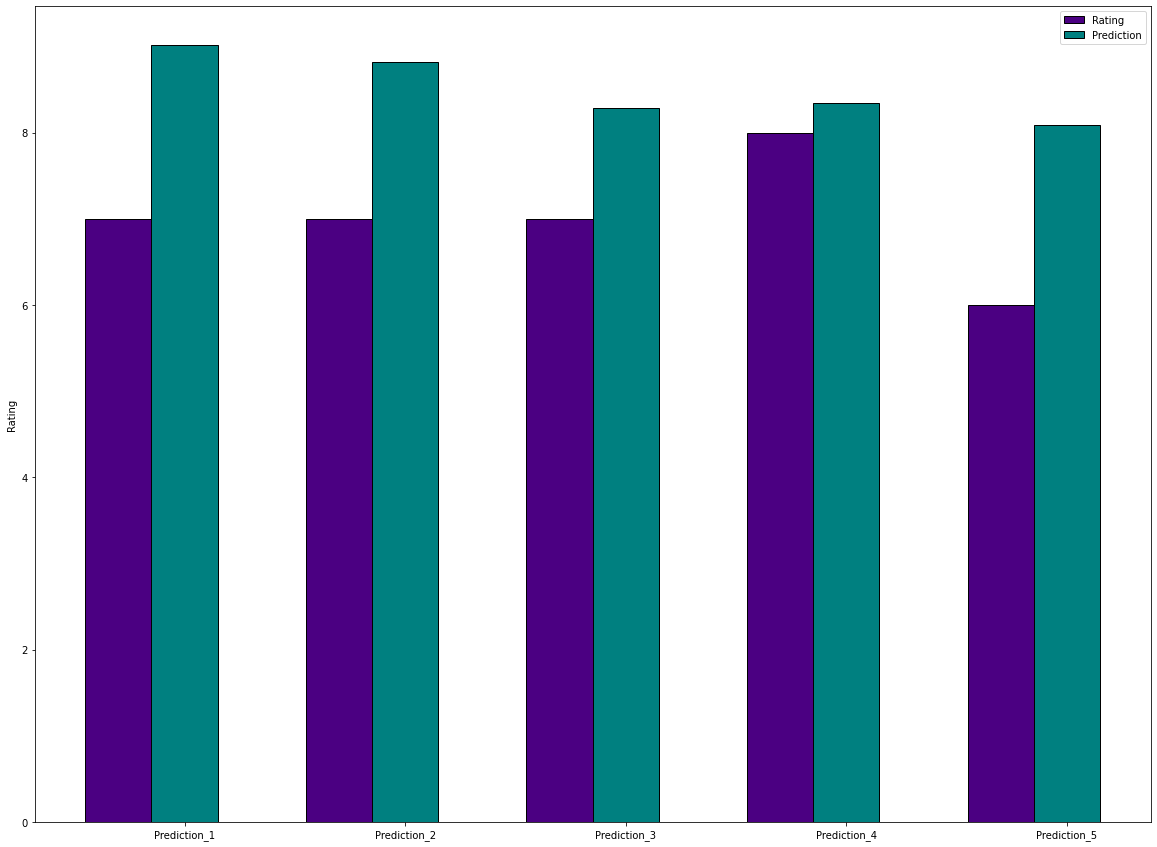

In [79]:
rank, iter, lambda_ = 200, 10, 0.1
model = ALS.train(trainingData, rank=rank, iterations=iter, lambda_=lambda_, seed=5047)
predictions = model.predictAll(testData)
allPredictRatings=predictions.map(lambda l: float(l[2]))
arr_allPredictRatings=allPredictRatings.collect()
allTestRatings = testRatings.map(lambda l: l.split(',')).map(lambda l: (float(l[2]))) 
arr_allTestRatings=allTestRatings.collect()
calc_mse(arr_allTestRatings, arr_allPredictRatings)
plot_performance_evaluation_of_model(arr_allTestRatings, arr_allPredictRatings)

The Mean Square Error is:  6.341160191512541


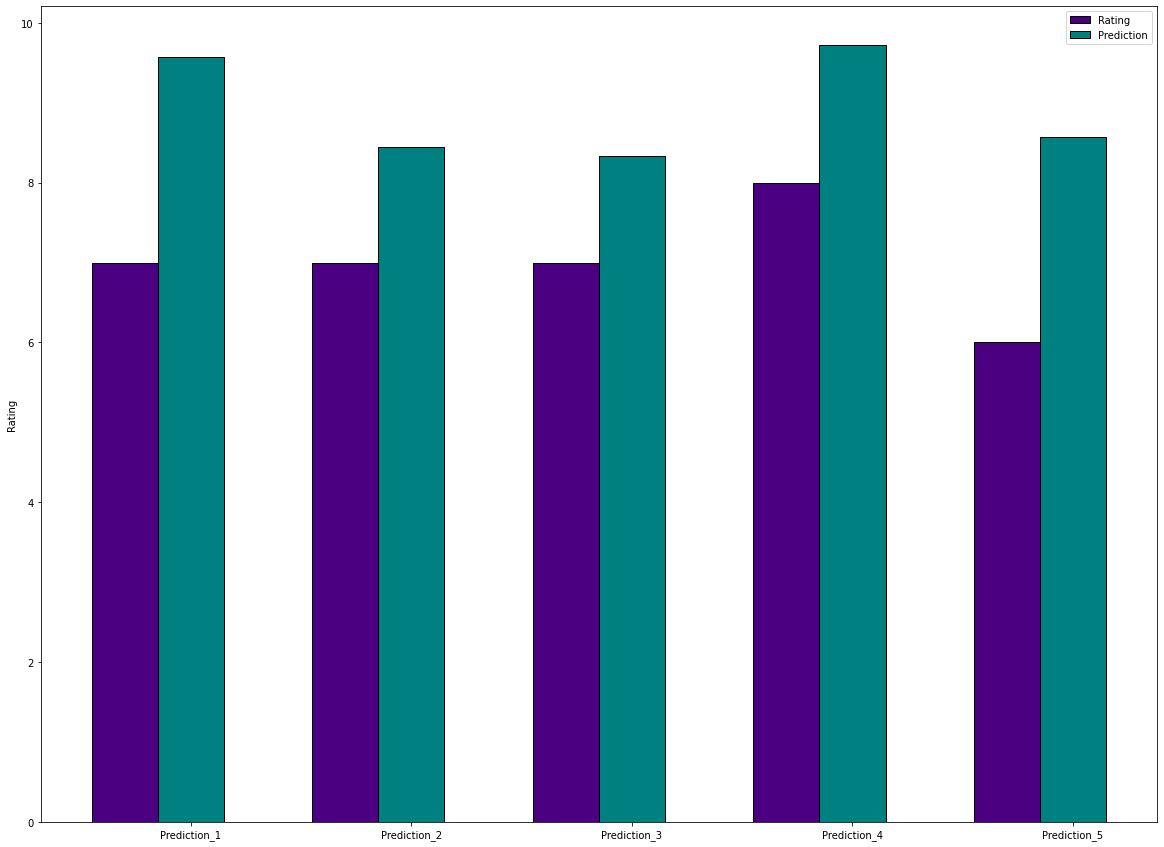

In [80]:
rank, iter, lambda_ = 200, 10, 0.01
model = ALS.train(trainingData, rank=rank, iterations=iter, lambda_=lambda_, seed=5047)
predictions = model.predictAll(testData)
allPredictRatings=predictions.map(lambda l: float(l[2]))
arr_allPredictRatings=allPredictRatings.collect()
allTestRatings = testRatings.map(lambda l: l.split(',')).map(lambda l: (float(l[2]))) 
arr_allTestRatings=allTestRatings.collect()
calc_mse(arr_allTestRatings, arr_allPredictRatings)
plot_performance_evaluation_of_model(arr_allTestRatings, arr_allPredictRatings)

The Best Model

In [81]:
rating = sc.textFile("./preprocessed_data/rating.csv")
header = rating.first() #extract header
rating = rating.filter(lambda row: row != header)   #filter out header
rating.take(3)

['2485327,59,6', '2485327,74,7', '2485327,120,8']

In [82]:
rating = rating.map(lambda l: l.split(',')).map(lambda l: Rating(int(l[0]), int(l[1]), float(l[2]))) 
rating.take(3)

[Rating(user=2485327, product=59, rating=6.0),
 Rating(user=2485327, product=74, rating=7.0),
 Rating(user=2485327, product=120, rating=8.0)]

In [83]:
rank, iter, lambda_ = 50, 10, 0.1
model = ALS.train(rating, rank=rank, iterations=iter, lambda_=lambda_, seed=5047)

In [84]:
model.userFeatures().count()

1128

In [85]:
model.productFeatures().count()

6562

In [86]:
predicted_rating = model.predict(2485327, 59)
predicted_rating

6.305410861756205

Recommend the K number of animes for same user

In [87]:
userId= 2485327
K=10
top_k_recs = model.recommendProducts(userId,K)
for i in top_k_recs:
    print(i)

Rating(user=2485327, product=5114, rating=8.604624050269754)
Rating(user=2485327, product=28977, rating=8.578858356319806)
Rating(user=2485327, product=9969, rating=8.450538872916834)
Rating(user=2485327, product=15335, rating=8.348866375006146)
Rating(user=2485327, product=11061, rating=8.315705041905519)
Rating(user=2485327, product=34096, rating=8.270241019462864)
Rating(user=2485327, product=918, rating=8.268046259273754)
Rating(user=2485327, product=15417, rating=8.263535892421748)
Rating(user=2485327, product=28851, rating=8.199993627404377)
Rating(user=2485327, product=2904, rating=8.193178112804986)


In [88]:
animes = spark.read.csv("./preprocessed_data/anime.csv", header=True)
animes = animes.dropna()
animes = animes.rdd

In [89]:
anime_titles = animes.map(lambda line: line[:2]) \
                     .map(lambda x: (int(float(x[0])), x[1])).collectAsMap()

In [90]:
anime_titles

{11013: 'Inu x Boku SS',
 2104: 'Seto no Hanayome',
 5262: 'Shugo Chara!! Doki',
 721: 'Princess Tutu',
 12365: 'Bakuman. 3rd Season',
 6586: 'Yume-iro Pâtissière',
 178: 'Ultra Maniac',
 2787: 'Shakugan no Shana II (Second)',
 4477: 'Nodame Cantabile: Paris-hen',
 853: 'Ouran Koukou Host Club',
 4814: 'Junjou Romantica 2',
 7054: 'Kaichou wa Maid-sama!',
 11123: 'Sekaiichi Hatsukoi 2',
 14227: 'Tonari no Kaibutsu-kun',
 269: 'Bleach',
 59: 'Chobits',
 6045: 'Kimi ni Todoke',
 1735: 'Naruto: Shippuuden',
 210: 'Ranma ½',
 4224: 'Toradora!',
 10030: 'Bakuman. 2nd Season',
 74: 'Gakuen Alice',
 4722: 'Skip Beat!',
 14397: 'Chihayafuru 2',
 1557: 'Shounen Onmyouji',
 10800: 'Chihayafuru',
 3731: 'Itazura na Kiss',
 9513: 'Beelzebub',
 5835: 'Hanasakeru Seishounen',
 9863: 'SKET Dance',
 7817: 'B-gata H-kei',
 966: 'Crayon Shin-chan',
 120: 'Fruits Basket',
 957: 'Saiunkoku Monogatari',
 21: 'One Piece',
 1974: 'Glass no Kamen (2005)',
 857: 'Air Gear',
 1914: 'Saiunkoku Monogatari 2nd Sea

In [91]:
rating = rating.map(lambda x: Rating(int(x[0]), int(x[1]), float(x[2])))

In [92]:
animes_for_user = rating.keyBy(lambda x: x.user)
animes_for_user.take(10)

[(2485327, Rating(user=2485327, product=59, rating=6.0)),
 (2485327, Rating(user=2485327, product=74, rating=7.0)),
 (2485327, Rating(user=2485327, product=120, rating=8.0)),
 (2485327, Rating(user=2485327, product=178, rating=5.0)),
 (2485327, Rating(user=2485327, product=210, rating=7.0)),
 (2485327, Rating(user=2485327, product=232, rating=9.0)),
 (2485327, Rating(user=2485327, product=249, rating=7.0)),
 (2485327, Rating(user=2485327, product=269, rating=8.0)),
 (2485327, Rating(user=2485327, product=853, rating=9.0)),
 (2485327, Rating(user=2485327, product=857, rating=7.0))]

In [110]:
animes_for_user = rating.keyBy(lambda x: x.user).lookup(2485327)

In [94]:
len(animes_for_user)

3012

In [95]:
animes_for_user.sort(reverse=True,key= lambda x: x.rating)

In [96]:
animes_for_user

[Rating(user=2485327, product=16, rating=10.0),
 Rating(user=2485327, product=392, rating=10.0),
 Rating(user=2485327, product=777, rating=10.0),
 Rating(user=2485327, product=877, rating=10.0),
 Rating(user=2485327, product=918, rating=10.0),
 Rating(user=2485327, product=1535, rating=10.0),
 Rating(user=2485327, product=1575, rating=10.0),
 Rating(user=2485327, product=1604, rating=10.0),
 Rating(user=2485327, product=2904, rating=10.0),
 Rating(user=2485327, product=4081, rating=10.0),
 Rating(user=2485327, product=5114, rating=10.0),
 Rating(user=2485327, product=9969, rating=10.0),
 Rating(user=2485327, product=10087, rating=10.0),
 Rating(user=2485327, product=10408, rating=10.0),
 Rating(user=2485327, product=11061, rating=10.0),
 Rating(user=2485327, product=11741, rating=10.0),
 Rating(user=2485327, product=12531, rating=10.0),
 Rating(user=2485327, product=13601, rating=10.0),
 Rating(user=2485327, product=15335, rating=10.0),
 Rating(user=2485327, product=15417, rating=10.0)

10 animes with the highest ratings for user 2485327

In [97]:
sc.parallelize(animes_for_user[:10])\
.map(lambda rating: (anime_titles[rating.product], rating.rating)).collect()

[('Hachimitsu to Clover', 10.0),
 ('Yuu☆Yuu☆Hakusho', 10.0),
 ('Hellsing Ultimate', 10.0),
 ('Nana', 10.0),
 ('Gintama', 10.0),
 ('Death Note', 10.0),
 ('Code Geass: Hangyaku no Lelouch', 10.0),
 ('Katekyo Hitman Reborn!', 10.0),
 ('Code Geass: Hangyaku no Lelouch R2', 10.0),
 ('Natsume Yuujinchou', 10.0)]

Top 10 recommendations for user 2485327

In [98]:
sc.parallelize(top_k_recs)\
.map(lambda rating: (anime_titles[rating.product], rating.rating))\
.collect()

[('Fullmetal Alchemist: Brotherhood', 8.604624050269754),
 ('Gintama°', 8.578858356319806),
 ('Gintama&#039;', 8.450538872916834),
 ('Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare', 8.348866375006146),
 ('Hunter x Hunter (2011)', 8.315705041905519),
 ('Gintama.', 8.270241019462864),
 ('Gintama', 8.268046259273754),
 ('Gintama&#039;: Enchousen', 8.263535892421748),
 ('Koe no Katachi', 8.199993627404377),
 ('Code Geass: Hangyaku no Lelouch R2', 8.193178112804986)]

Recommend the top-K users for a given product

In [99]:
productID = 1575
K = 10
topKuser= model.recommendUsers(productID,K)
for i in topKuser:
    print(i)

Rating(user=3717201, product=1575, rating=10.91952844517011)
Rating(user=187070, product=1575, rating=10.743225993058324)
Rating(user=37830, product=1575, rating=10.529058380473131)
Rating(user=3535317, product=1575, rating=10.5120109524083)
Rating(user=5330916, product=1575, rating=10.482639712521365)
Rating(user=321224, product=1575, rating=10.45610420066881)
Rating(user=2528591, product=1575, rating=10.442612993954825)
Rating(user=149805, product=1575, rating=10.425730697130227)
Rating(user=1396673, product=1575, rating=10.422951680546216)
Rating(user=6493369, product=1575, rating=10.421469471847235)


In [100]:
IDs_with_users = {v: k for k, v in users_with_IDs.items()}

Top 10 users for anime 1575

In [102]:
sc.parallelize(topKuser)\
.map(lambda rating: (IDs_with_users[rating.user], rating.user))\
.collect()

[('OrangeJP', 3717201),
 ('Blutsauger', 187070),
 ('Bleach2903', 37830),
 ('NoFear94', 3535317),
 ('animangafreak_ZX', 5330916),
 ('mangafreakZX', 321224),
 ('Mikura-san', 2528591),
 ('Insaner', 149805),
 ('Deodatus', 1396673),
 ('Z3R0215', 6493369)]

################################################

COSINE SIMILARITY

################################################

In [103]:
def cosineSimilarity(item_id,a,b):
    dot=np.dot(a,b)
    norma = np.linalg.norm(a)
    normb = np.linalg.norm(b)
    cos= dot/ (norma*normb)
    return item_id,cos

In [104]:
item_id=1575
item_vector= model.productFeatures().lookup(item_id)[0]
item_vector

array('d', [0.1051260307431221, -0.3608165979385376, 0.17018842697143555, -0.8416979312896729, -0.07852023839950562, 0.4744715690612793, -0.203826442360878, 0.8742927312850952, -0.5257149934768677, -0.1195378452539444, 0.40717509388923645, 0.7782883048057556, 0.31561973690986633, -0.6437272429466248, 0.3100683391094208, 0.053070973604917526, 0.6793628334999084, -0.13710960745811462, 0.011507556773722172, 0.36859557032585144, 0.2708421051502228, 0.02490358240902424, -0.2877660393714905, -0.5923475623130798, -0.1430794596672058, 0.2150927484035492, -0.5587209463119507, 0.43303343653678894, -0.31505733728408813, 0.019449861720204353, -0.08730537444353104, 0.22476708889007568, -0.6044133901596069, 0.5923047065734863, -0.19442372024059296, -0.032212577760219574, -0.5002377033233643, 0.28035634756088257, 0.2979603409767151, -0.583759605884552, -0.6487153172492981, -0.2596248388290405, -0.33610063791275024, -0.316127747297287, 0.5092137455940247, 0.33450421690940857, 0.6262254118919373, -0.45

In [105]:
anime_titles[item_id]

'Code Geass: Hangyaku no Lelouch'

In [106]:
cosineSimilarity(item_id,item_vector,item_vector)

(1575, 1.0)

In [107]:
sims= model.productFeatures().map(lambda data: cosineSimilarity(data[0],data[1],item_vector))
top_10_animes = sims.top(10,key=lambda x:x[1])
top_10_animes

[(1575, 1.0),
 (2904, 0.9916148768107302),
 (1535, 0.9692418266740028),
 (28701, 0.9641875052401006),
 (5114, 0.9628643145538743),
 (10030, 0.9625816937009062),
 (11741, 0.9616054318643035),
 (73, 0.9594466084994436),
 (1889, 0.9590255723320348),
 (13601, 0.958501290204687)]

In [108]:
top_10_animes_titles = [anime_titles[a[0]] for a in top_10_animes]
top_10_animes_titles

['Code Geass: Hangyaku no Lelouch',
 'Code Geass: Hangyaku no Lelouch R2',
 'Death Note',
 'Fate/stay night: Unlimited Blade Works 2nd Season',
 'Fullmetal Alchemist: Brotherhood',
 'Bakuman. 2nd Season',
 'Fate/Zero 2nd Season',
 'Full Metal Panic! The Second Raid',
 'Higurashi no Naku Koro ni Kai',
 'Psycho-Pass']